In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocessingFuncts as pp

In [9]:
# getting genres for all movies
itemData = pp.readItemData()
itemData = itemData.drop(['title','year','year_category'],axis='columns')
itemData


,item_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
ratingData = pp.readRatingData('ml-100k\\ua.base')
ratingData = ratingData.groupby('user_id')
genres = ['unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

users = pd.DataFrame(columns=genres.copy().extend(['user_id']))

for key in ratingData.groups.keys():
    temp = ratingData.get_group(key).merge(itemData)
    temp[genres] = temp[genres].multiply(
        temp['rating'], axis="index")
    temp = temp.drop(['user_id','item_id','rating'],axis='columns').sum(axis='index')
    temp = pd.DataFrame(temp).transpose()
    baseWeight = int(temp.sum(axis='columns'))
    temp = temp/baseWeight
    temp['user_id'] = key
    users = users.append(temp, ignore_index=True)
users = users.set_index('user_id')
display(users)


,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
user_id,,,,,,,,,,,,,,,,,,,
1,0.001997,0.119321,0.059910,0.018472,0.027459,0.151273,0.042936,0.011982,0.203694,0.003495,0.002496,0.022466,0.017973,0.008987,0.078882,0.083375,0.088367,0.045931,0.010984
2,0.000000,0.073418,0.020253,0.010127,0.027848,0.116456,0.078481,0.000000,0.303797,0.007595,0.022785,0.015190,0.007595,0.027848,0.146835,0.025316,0.101266,0.015190,0.000000
3,0.000000,0.088652,0.035461,0.000000,0.000000,0.095745,0.092199,0.017730,0.216312,0.000000,0.017730,0.031915,0.014184,0.095745,0.042553,0.067376,0.138298,0.046099,0.000000
4,0.000000,0.162963,0.066667,0.000000,0.000000,0.074074,0.103704,0.037037,0.111111,0.000000,0.000000,0.000000,0.037037,0.096296,0.022222,0.081481,0.177778,0.029630,0.000000
5,0.003640,0.150136,0.093722,0.044586,0.059145,0.213831,0.028207,0.000000,0.061874,0.004550,0.004550,0.059145,0.036397,0.008189,0.040036,0.105551,0.041856,0.040036,0.004550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.000000,0.180516,0.088825,0.000000,0.000000,0.131805,0.037249,0.000000,0.203438,0.011461,0.000000,0.008596,0.000000,0.011461,0.123209,0.063037,0.111748,0.028653,0.000000
940,0.000000,0.101877,0.042895,0.012064,0.028150,0.183646,0.040214,0.000000,0.199732,0.000000,0.016086,0.016086,0.025469,0.017426,0.096515,0.077748,0.080429,0.061662,0.000000
941,0.000000,0.198020,0.089109,0.099010,0.049505,0.207921,0.029703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138614,0.188119,0.000000,0.000000


In [44]:
testData = pp.readRatingData('ml-100k\\ua.test')
# testData = testData.groupby('user_id').get_group(1)
testX, testY = testData.loc[:, ['user_id',
                                'item_id']], testData.loc[:, 'rating']

testX = testX.merge(itemData,on='item_id')
testX['genre_count'] = 0
testX['sum'] = 0
testX = testX.groupby('user_id')
xUsers = testX.groups.keys()

predY = []

for user in xUsers:
  user = 1
  curUser = testX.get_group(user)
  curUser.loc[:,'genre_count'] = pd.Series(curUser.loc[:,genres].sum(axis='columns'))
  curUser.loc[:,'sum'] = curUser.loc[:,genres].mul(
      users.loc[user, :]).sum(axis='columns')
  curUser.loc[:, 'sum/n'] = curUser.loc[:,
                                        'sum'].div(curUser.loc[:, 'genre_count'])
  curUser.loc[:, 'guess'] = curUser.loc[:, 'sum'].mul(21).apply(np.floor)
  curUser['guess'] = curUser['guess'].map(lambda x:x if x<=5 else 5)
  predY.extend(curUser['guess'].to_list())
print(predY)

# testX

<ipython-input-44-326b87947656>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curUser['guess'] = curUser['guess'].map(lambda x:x if x<=5 else 5)


[5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0, 5.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 3.0, 4.0, 4.0,

In [45]:
from sklearn.metrics import classification_report

print(classification_report(testY, predY))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       542
           2       0.11      0.11      0.11       995
           3       0.28      0.11      0.16      2424
           4       0.34      0.48      0.40      3316
           5       0.26      0.34      0.29      2153

    accuracy                           0.29      9430
   macro avg       0.20      0.21      0.19      9430
weighted avg       0.26      0.29      0.26      9430



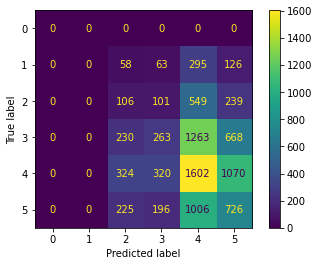

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(
    testY, predY, labels=[0, 1, 2, 3, 4, 5]
)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5])
disp.plot()
plt.show()